In [49]:
import queue_ as qu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rm


## Эксперименты с различными параметрами

#### В ходе экспериментов будем вычислять следующие метрики:

    1) Среднее время пребывания требования в системе
    2) Вероятность ожидания (требование пришло, а очередь непустая)
    3) Среднее количество заявок в очереди
    4) Эргодическое распределение                                  Вероятность простоя системы (оба сервера свободны и очередь пустая)



In [29]:
def count_metrics(size_metrics, u_metrics, lam_metrics):
    queue = qu.Queue(seed=rm.randint(0, 10 ** 5), lam=lam_metrics, u=u_metrics, size=size_metrics)
    metrics = pd.DataFrame(columns=['Average time in the system',
                    'Probability of waiting',
                    'Average count of customers in the queue',
                    '------------------'])

    metrics['Average time in the system'] = [i[2] - i[0] for i in queue.client_schedule]
    client_was_waiting = []
    truhnie = 0
    for i in range(len(queue.client_schedule)):
        if queue.client_schedule[i][1]-queue.client_schedule[i][0]:
            truhnie += 1
        client_was_waiting.append(truhnie/(i+1))
    metrics['Probability of waiting'] = client_was_waiting
    
    metrics['Average count of customers in the queue'] = [queue._a(i[0]) for i in queue.client_schedule]
    people_num = [queue._a(i[0]) for i in queue.client_schedule]
    metrics['Average count of customers in the queue'] = [sum(people_num[:i+1])/(i+1) for i in range(len(people_num))]

    return metrics

In [34]:
print(count_metrics(size_metrics=5, u_metrics=2, lam_metrics= 5) )

     Average time in the system  Probability of waiting  \
0                      0.505348                0.000000   
1                      1.245429                0.500000   
2                      0.913866                0.666667   
3                      0.659178                0.750000   
4                      0.547962                0.800000   
..                          ...                     ...   
234                    0.761016                0.906383   
235                    0.755612                0.906780   
236                    0.614981                0.907173   
237                    0.447535                0.907563   
238                    0.719881                0.907950   

     Average count of customers in the system ------------------  
0                                    1.000000                NaN  
1                                    1.500000                NaN  
2                                    1.666667                NaN  
3                      

# 1. Рассмотрим случай для <mi>&#x3BB;</mi> > <mi>&#x3BC;</mi>

# <mi>&#x3BC;</mi> = 2, <mi>&#x3BB;</mi> от 0 до 10, K = 5 

In [45]:
x = np.linspace(0.1, 9.9, 99)
y = []
for i in x:
    metrics_now = count_metrics(size_metrics=5, u_metrics=2, lam_metrics = i)
    y.append([list(metrics_now['Average time in the system'])[-1], list(metrics_now['Probability of waiting'])[-1],
    list(metrics_now['Average count of customers in the queue'])[-1], list(metrics_now['------------------'])[-1]])



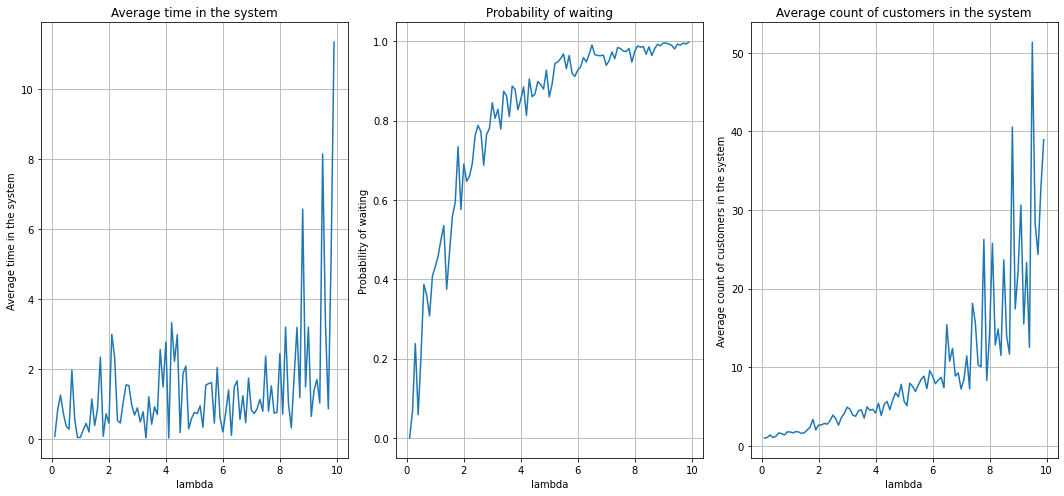

In [66]:
titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue', '------------------']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('lambda')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

# <mi>&#x3BC;</mi> от 5 до 15, <mi>&#x3BB;</mi> = 25, K = 5

In [85]:
y = []
x = np.linspace(5.1, 15, 99)
for i in x:
    metrics_now = count_metrics(size_metrics=5, u_metrics=i, lam_metrics = 25)
    y.append([list(metrics_now['Average time in the system'])[-1], list(metrics_now['Probability of waiting'])[-1],
    list(metrics_now['Average count of customers in the queue'])[-1], list(metrics_now['------------------'])[-1]])

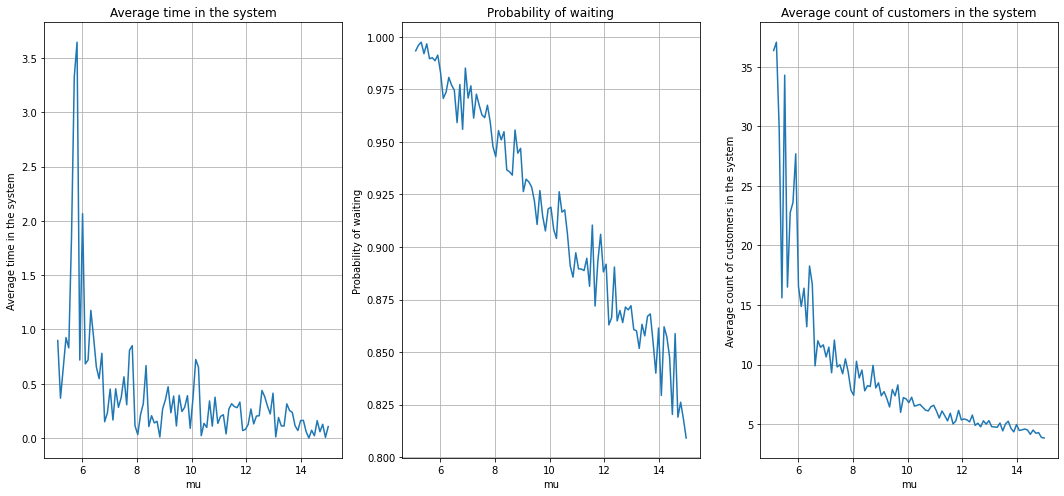

In [86]:
titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue', '------------------']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('mu')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

# <mi>&#x3BC;</mi> = 2, <mi>&#x3BB;</mi> = 50, K от 25 до 75

In [93]:
y = []
x = [i for i in range(25, 76)]
for i in x:
    metrics_now = count_metrics(size_metrics=i, u_metrics=2, lam_metrics = 50)
    y.append([list(metrics_now['Average time in the system'])[-1], list(metrics_now['Probability of waiting'])[-1],
    list(metrics_now['Average count of customers in the queue'])[-1], list(metrics_now['------------------'])[-1]])

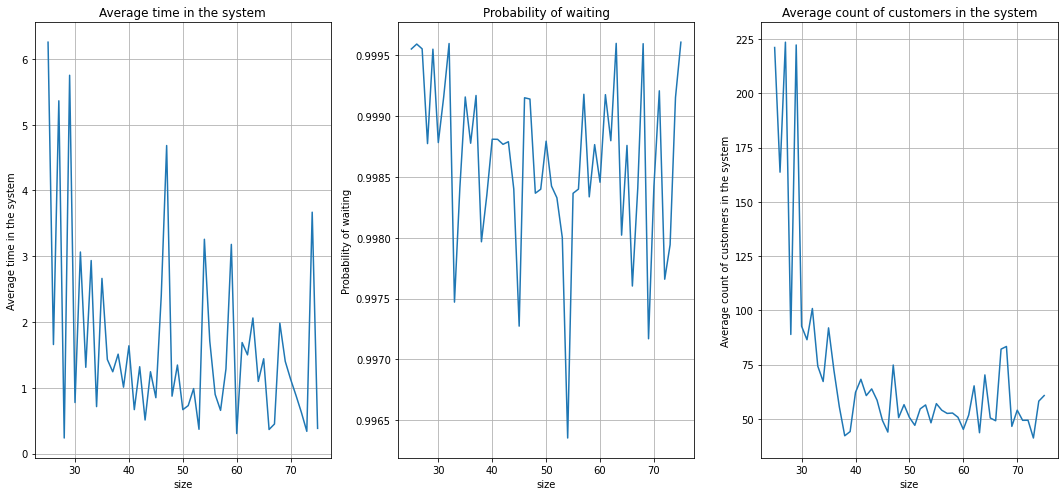

In [94]:
titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue', '------------------']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('size')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

# 2. Рассмотрим случай для <mi>&#x3BB;</mi> <mo>&#x2264;</mo> <mi>&#x3BC;</mi>

# <mi>&#x3BC;</mi> = 2, <mi>&#x3BB;</mi> от 10 до 20, K 5

In [103]:
x = np.linspace(10, 19.9, 99)
y = []
for i in x:
    metrics_now = count_metrics(size_metrics=5, u_metrics=2, lam_metrics = i)
    y.append([list(metrics_now['Average time in the system'])[-1], list(metrics_now['Probability of waiting'])[-1],
    list(metrics_now['Average count of customers in the queue'])[-1], list(metrics_now['------------------'])[-1]])

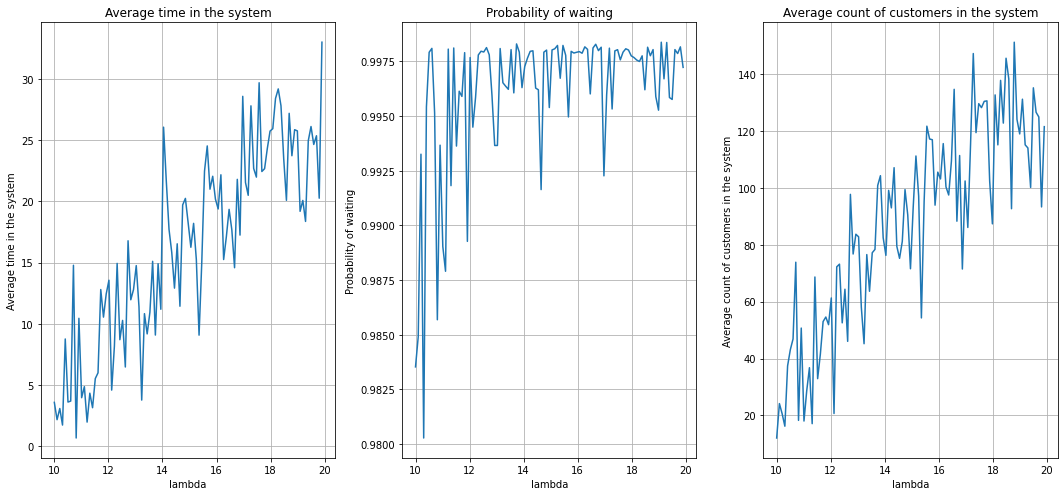

In [104]:
titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue', '------------------']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('lambda')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

# <mi>&#x3BC;</mi> от 1 до 5, <mi>&#x3BB;</mi> = 25, K = 5

In [105]:
y = []
x = np.linspace(1.1, 5, 99)
for i in x:
    metrics_now = count_metrics(size_metrics=5, u_metrics=i, lam_metrics = 25)
    y.append([list(metrics_now['Average time in the system'])[-1], list(metrics_now['Probability of waiting'])[-1],
    list(metrics_now['Average count of customers in the queue'])[-1], list(metrics_now['------------------'])[-1]])


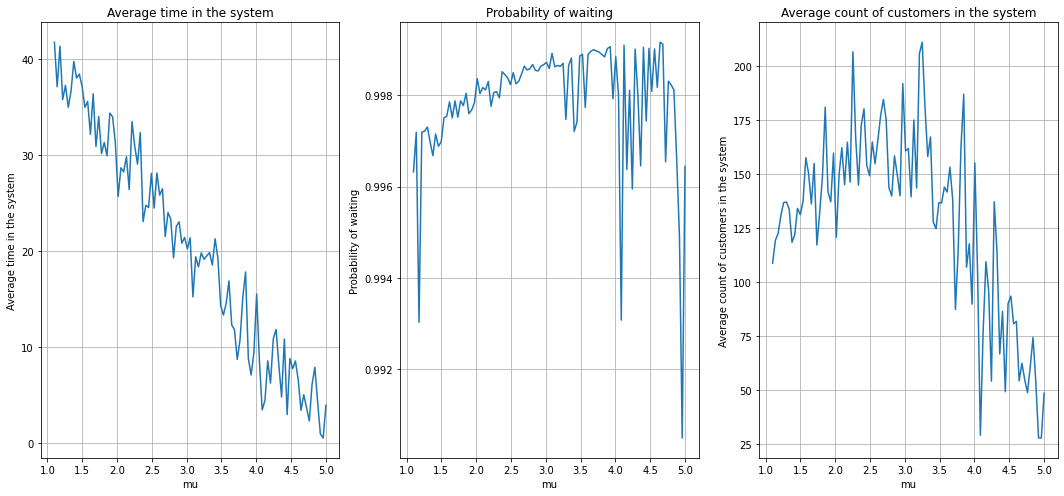

In [106]:
titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue', '------------------']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('mu')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])

# <mi>&#x3BC;</mi> = 2, <mi>&#x3BB;</mi> = 150, K от 25 до 75

In [107]:
y = []
x = [i for i in range(25, 76)]
for i in x:
    metrics_now = count_metrics(size_metrics=i, u_metrics=2, lam_metrics = 150)
    y.append([list(metrics_now['Average time in the system'])[-1], list(metrics_now['Probability of waiting'])[-1],
    list(metrics_now['Average count of customers in the queue'])[-1], list(metrics_now['------------------'])[-1]])

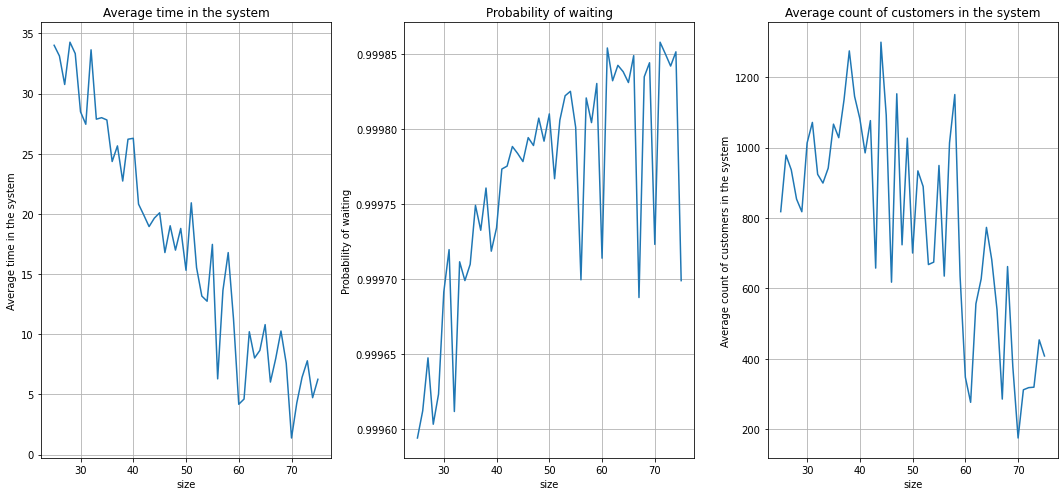

In [108]:
titles = ['Average time in the system', 'Probability of waiting', 'Average count of customers in the queue', '------------------']
plt.figure(figsize=(15,7))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.title(titles[j])
    plt.xlabel('size')
    plt.ylabel(titles[j])
    plt.tight_layout()
    plt.grid()
    plt.plot(x, [i[j] for i in y])